# Data analysis of Saskatoon tweets
_by Jude Pineda_

First, let's import the pandas.

In [11]:
import json
import pandas as pd

# Enable inline plotting
%matplotlib inline

## Defining a dataframe extraction function and cleaning up the dataset

This function takes in a JSON input file, in our case `stoonTweets.json`, and fills a pandas dataframe with it.

In [6]:
def pop_tweets(inputFile):

    # Project proposal outlines these columns: 
    # text, author, timestamp, hashtags, retweet count, location (for geotagged tweets), and source

    #Declare a new data frame with pandas, with some specific column names
    tweets = pd.DataFrame(columns=[
    	'userHandle','text','timestamp','location','retweet count','source'
    	])

    #Open the text file that contains the tweets we collected
    tweets_file = open(inputFile, "r")
    
    #Read the text file line by line
    for line in tweets_file:
        
        #Load the JSON information
        tweet = json.loads(line)
        
        #If the tweet isn't empty, add it to the data frame
        if ('text' in tweet): 
            tweets.loc[len(tweets)]=[tweet['user']['screen_name'],tweet['text'],\
            	tweet['created_at'],tweet['place']['full_name'],tweet['retweet_count'],\
            	tweet['source']
            ]

    return tweets

In [136]:
# Populate the pandas dataframe with our JSON file
yxe_tweets = pop_tweets('stoonTweets.json')

Let's do some cleaning up on the dataframe. We remove the `<a href` tags from the source column, and some extraneous information in the timestamp column. Luckily, this is easy to do using pandas:

In [137]:
# Not really. Here's a list of all the regular expressions I tried to properly strip the input.

# yxe_tweets['source'] = yxe_tweets.source.str.replace('\<a href="?"\>,?' , '')
# FULL REGEX: (\<a href\=.+\>)(.+)(\<\/a\>)
# df.sport.str.replace(r'(^.*ball.*$)', 'ball sport')
# df['result'].str.lstrip('+-').str.rstrip('aAbBcC')
# yxe_tweets['source'] = yxe_tweets['source'].str.lstrip('\<a href\=\".+\" rel=\".+\"\>').str.rstrip('\<\/a\>')

yxe_tweets['source'] = yxe_tweets.source.str.replace("\<a href\=\".+\"\s*rel\=\"nofollow\"\>", '')
yxe_tweets['source'] = yxe_tweets.source.str.replace("\<\/a\>", '')
# yxe_tweets['timestamp'] = yxe_tweets.timestamp.str.replace("\+0000 2017", '')


Now let's see our dataframe content.

In [174]:
pd.set_option('display.max_colwidth', 200)  
pd.set_option('display.max_rows', 50)
yxe_tweets

,userHandle,text,timestamp,location,retweet count,source
timestamp,,,,,,
2017-12-04 03:13:31-06:00,TheCandyShow,"Gord Downie Was Celebrated For Championing Indigenous Rights. Now That He's Gone, Do People Still Care?… https://t.co/eITxoT6skw",2017-12-04 21:13:31,"Saskatoon, Saskatchewan",0,Twitter for iPhone
2017-12-04 03:11:45-06:00,LuxquisiteStyle,Sunday Dec 10th 12-4pm! Our last pop-up before Christmas! 🎄 Check out the link for details. https://t.co/07HHHTBGsa https://t.co/gSvHJadsxT,2017-12-04 21:11:45,Luxquisite Clothing,0,Twitter for iPhone
2017-12-04 03:08:20-06:00,notsogoodal,Met a person who would not stop hitting me in the arm with the back of her hand during our entire conversation. Why… https://t.co/1woJhOOkwW,2017-12-04 21:08:20,"Saskatoon, Saskatchewan",0,Twitter for iPhone
2017-12-04 03:08:06-06:00,snowded,@arifbobat @Mark_Nilsen_ @thisagileguy @tobiasmayer @alshalloway @RonJeffries Human systems tend to order - it may… https://t.co/6JmX7aH2kr,2017-12-04 21:08:06,"Saskatoon, Saskatchewan",0,Tweetbot for Mac
2017-12-04 03:08:00-06:00,Skaboomatude,Drinking an Angus Stout by @9milelegacy @ The Rook &amp; Raven — https://t.co/6c9gWxexPj,2017-12-04 21:08:00,"Saskatoon, Saskatchewan",0,Untappd
2017-12-04 03:04:57-06:00,TheCandyShow,Look at what @aircanada hooked me up with for my birthday!! #skyqueen #birthdaygirl @ Sheraton… https://t.co/U92W59yRGM,2017-12-04 21:04:57,"Saskatoon, Saskatchewan",0,Instagram
2017-12-04 03:01:11-06:00,Stoon_Slar,"@BarristerSecret Kinda like the quivalent of, “The dog wrote my homework.”",2017-12-04 21:01:11,"Saskatoon, Saskatchewan",0,Twitter for iPhone
2017-12-04 03:00:01-06:00,WASHDUDE,True. Just sayin if you get stuck. It’s hard to dig out with pot cap limit there https://t.co/noDY19TkD4,2017-12-04 21:00:01,"Saskatoon, Saskatchewan",0,Twitter for iPhone
2017-12-04 02:53:11-06:00,snowded,@Mark_Nilsen_ @arifbobat @thisagileguy @tobiasmayer @alshalloway @RonJeffries Yep - made it more explicit with the… https://t.co/iCk4fB1uUu,2017-12-04 20:53:11,"Saskatoon, Saskatchewan",0,Tweetbot for Mac


## Data insight \#1: Influence and Platform

Let's start off our analysis by finding the most retweeted tweet during the week. This is easily obtained by getting the tweet with the highest `retweet_count`. Let's check the top 10 most retweeted tweets of the past week:

In [113]:
most_retweets = yxe_tweets.sort_values('retweet count', ascending=False)
most_retweets.head(10)[['userHandle', 'text', 'retweet count']]

,userHandle,text,retweet count
2075,sibbsniel,The Police Commissioner Chihuri &amp; his top brace must GO for all the corrupt ills&amp; brutality of ZRP. If you agree wi… https://t.co/8k09dHHwtY,268
1557,Bruiser_17,CONTEST TIME! 👏🏼\n2 SEASON TICKETS FOR @SaskRushLAX HOME OPENER ON SAT. DEC. 23RD! \nALL YOU HAVE TO DO IS RETWEET &amp;… https://t.co/JBymQS054j,95
385,sibbsniel,"President ED, you can no longer keep the incompetent Dr Parirenyatwa in cabinet whilst the people’s voice is a big… https://t.co/ocyPf1iM3I",91
729,SophieIsZeus,It be ya own sibling #sabbathedition https://t.co/h16SxQticu,85
1841,emily_complido,"Ikaw Lang ang aking mahal ang pag ibig mo'y aking kailangan Guys, pa trend natin pleeeaseee\n\nInigoPascual LiveAtSho… https://t.co/w2cB0iHJrP",59
2349,PaulSeesequasis,ᓈᑲᑌᔨᒥᓱᐃᐧᐣ [nâkateyimisowin] - The act of looking after oneself; the act of nurturing oneself; self-control.,57
1831,SaskRushLAX,Time for a friendly competition #RushNation! Let's take a vote to see who you think grew it better? \n\n❤️ for… https://t.co/NYKCO8lpU8,57
1830,JarisSwidrovich,Saskatoon folks (and visitors to Saskatoon):\n \nPlease familiarize yourself with this list of warm-up locations avai… https://t.co/OK9qLG3oKu,55
1493,SkWanderer,"I’m not going to lie, I had no idea that #Saskatchewan was home to a company that produces and ships ambulances all… https://t.co/bygXTpmLm5",43
1880,PaulSeesequasis,Saskatoon tomorrow for Marlene Bird https://t.co/9BIa2zCwuX,33


Let's find the user with the most tweets during this week, and take the top 10 tweeters:

In [115]:
yxe_tweets['userHandle'].value_counts().head(10)

sibbsniel          75
prxdspxxky         58
SophieIsZeus       57
MattYoungCTV       47
basementgalaxy     46
Denise13F          45
OmayraIssa         41
PaulSeesequasis    39
PocketFullOFish    37
lollipopdragon     34
Name: userHandle, dtype: int64

In a similar fashion, we'll take the most-used platform for publishing tweets:

In [116]:
yxe_tweets['source'].value_counts()

Twitter for iPhone     1575
Twitter for Android     669
Instagram               247
Twitter Web Client       90
Tweetbot for iΟS         35
Twitter for iPad         24
Tariox                   11
Tweetbot for Mac          9
Foursquare                9
TweetMyJOBS               8
circlepix                 5
Untappd                   3
I Heart Locations         2
Hootsuite                 1
dlvr.it                   1
New Foodpages             1
Name: source, dtype: int64

## Data insight \#2: Trends

To analyze this data insight we'll take a look into the natural language toolkit to determine words that are frequently used in tweets:

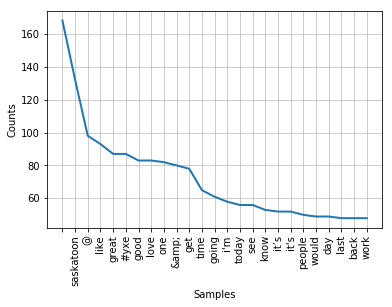

None


In [172]:
# from collections import Counter
# import nltk
# import matplotlib
# import matplotlib.pyplot as plt

# top_N = 30

# df['text'] = yxe_tweets['text']

# nltk.download('stopwords')
# stopwords = nltk.corpus.stopwords.words('english')

# # TODO: Filter out punctuation
# # RegEx for stopwords
# RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))
# # replace '|'-->' ' and drop all stopwords
# words = (df.text
#            .str.lower()
#            .replace([r'\|', RE_stopwords], [' ', ''], regex=True)
#            .str.cat(sep=' ')
#            .split()
# )

# # generate DF out of Counter
# rslt = pd.DataFrame(Counter(words).most_common(top_N),
#                     columns=['Word', 'Frequency']).set_index('Word')
# print(rslt)

# # plot
# # rslt.plot.bar(rot=0, figsize=(16,10), width=0.8)


############################################################

import nltk

from nltk.corpus import stopwords
from nltk import FreqDist

# get english stopwords
stop = stopwords.words('english')
texts = yxe_tweets['text']


yxe_tweets['timestamp'] = pd.to_datetime(pd.Series(yxe_tweets['timestamp']))

tokens = []

# strip words of punctuation marks
for text in texts.values:
  tokens.extend([word.lower().strip(':,."-') for word in text.split()])

filtered_tokens = [word for word in tokens if not word in stop]

freq_dist = nltk.FreqDist(filtered_tokens)


print(freq_dist.plot(25))


## Data insight \#3: Activity

In this data insight, we will take a look at a histogram of when tweets are posted over the course of a day, as well as plotting the locations where the tweets in Saskatoon are coming from (TODO)

In [168]:
import vincent

yxe_tweets['timestamp'] = pd.to_datetime(pd.Series(yxe_tweets['timestamp']))

# set index to 'created_at'
yxe_tweets.set_index('timestamp', drop=False, inplace=True)
yxe_tweets.index = yxe_tweets.index.tz_localize('GMT').tz_convert('America/Regina')

# convert to 12 hour format
yxe_tweets.index = yxe_tweets.index - pd.DateOffset(hours = 12)

# created_at index is formatted to per minute
yxe_tweets_pm = yxe_tweets['timestamp'].resample('5t').count()


# create time series graph via Vincent
vincent.core.initialize_notebook()
area = vincent.Area(yxe_tweets_pm)
area.colors(brew='Spectral')
area.display()

## Network analysis

_TODO_